score matching base talks about how fisher divergence between model score and data score is equal to minimizing square of model estimated square and the trace of gradient of model scores, while this is encoraging, we have problems with low density regions as shown in guassian vector fields notebook. 

the hypothesis is that the data lie in some low manifold and when sampling from a random point in this ambient space, the gradient is zero in most of the space. 


## what does it mean to have a data in lower manifold?
Suppose your data is in 3D defined by (x, y, z) but say z=1 for all the points, then even though your data is in 3D, all the data is on a plane defined by z=1. this is what manifold hypothesis mean. 

Now how do we cover the entire ambient space? One way to do is adding different noise and pertub the data. How does the learning happen?

this comes from `Tweedie` formula, which states that if you observe noisy data z = $\mu$ + $\epsilon$ where $\epsilon$ is N(0, $\sigma^2$), the optimal estimate of $\mu$ is not just z but z plus some correction term. 

Here $\mu$ is our actual image and z is our noised image. 

Now what is this correction term? According to tweedie the correction term is  defined as  $\sigma^2$ log $\triangledown_{z}$ p(z)

overall the formula is 

$$
E[\mu/z] = z + \sigma^2 log \triangledown_{z} p(z)
$$

Actually this is very important. suppose u take a point x, randomly sample some 100 points to N(0, $\sigma^2$) add it to the original number. so x becomes x1, x2, x3, x4 ...., when we take mean of it, we get back x . but say u only have x1, then best way to get x is by using tweedie formula.


## Derivation of tweedie formula using integral calculus

follow this tweet 

Let's start with:
$$P(z) = \int P(\mu, z) d\mu = \int P(z|\mu) P(\mu) d\mu$$

We know that:
$$\nabla_z \log P = \frac{\partial P}{\partial z} \cdot \frac{1}{P}$$

Taking the gradient:
$$\nabla_z P(z) = \int \nabla_z P(z|\mu) P(\mu) d\mu$$

$$= \int (\nabla_z \log P(z|\mu)) P(z|\mu) P(\mu) d\mu$$

Since $P(z|\mu) = N(\mu, \sigma^2)$, we have $\nabla_z \log P(z|\mu) = -\frac{z-\mu}{\sigma^2}$:

$$= \int \frac{\mu-z}{\sigma^2} P(z|\mu) P(\mu) d\mu$$

$$= \frac{1}{\sigma^2} \int P(z|\mu) P(\mu) d\mu (\mu-z)$$

$$= \frac{P(z)}{\sigma^2} \left( \int \mu P(\mu|z) d\mu - \int z P(\mu|z) d\mu \right)$$

where we used $P(z|\mu)P(\mu) = P(\mu|z)P(z)$.

### Evaluating the integrals:

**(1)** $\int \mu P(\mu|z) d\mu = E[\mu|z]$

**(2)** $\int z P(\mu|z) d\mu = z \int P(\mu|z) d\mu = z \times 1 = z$

### why is $\int P(\mu|z) d\mu = 1$?

$$
\int P(\mu|z) d\mu =  \int P(\mu,z)/P(z) d\mu = 1/P(z) * \int P(\mu,z) d\mu 
$$

we know that 

$$
P(z) = \int P(\mu,z) d\mu 
$$


### Final step:
$$\nabla_z P(z) = \frac{P(z)}{\sigma^2} [E[\mu|z] - z]$$

Therefore:
$$\frac{\nabla_z P(z)}{P(z)} = \frac{1}{\sigma^2} [E[\mu|z] - z]$$

$$\nabla_z \log P(z) = \frac{E[\mu|z] - z}{\sigma^2}$$

Rearranging:
$$\boxed{E[\mu|z] = z + \sigma^2 \nabla_z \log P(z)}$$

In [6]:
import torch
import matplotlib.pyplot as plt
plt.style.use("bmh")

%matplotlib inline 

In [4]:
x = torch.tensor([5])
y = torch.normal(0, 10, size=(100,))

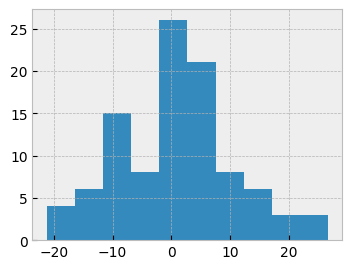

In [7]:
plt.figure(figsize=(4, 3))
plt.hist(y)
plt.show()

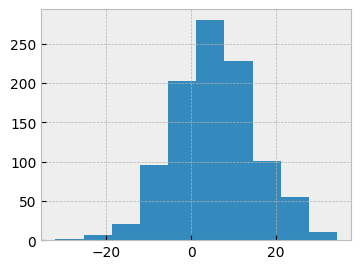

In [22]:
z = (x+y)
plt.figure(figsize=(4, 3))
plt.hist(z)
plt.show()

mean: 5.027153491973877


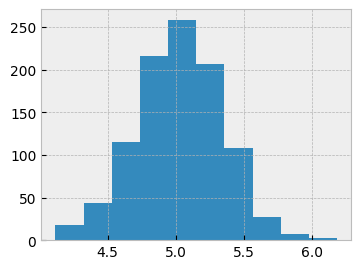

In [15]:
#3 lets sample multiple times and see 
out = []
for _ in range(1000):
    y = torch.normal(0, 10, size=(1000,))
    out.append((x+y).mean())
out = torch.stack(out)
print(f"mean: {out.mean()}")
plt.figure(figsize=(4, 3))
plt.hist(out)
plt.show()

## Denoising autoencoders
In denoising autoencoders, we add noise to each pixel, from the above example we can consider x to be our original pixel and one element in y to be noise, when we add them get z, when we pass z to a neural network it should output (x-z)/$\sigma^2$, so the objective function becomes 

$$
|| s(z, \sigma^2) - (x-z)/\sigma^2||^2_2
$$

Now we can take any neural network which maps N dimensional input to N dimensional output aka UNet and train the network. Post training we can use langevian dynamics to generate new samples from the network.